In [1]:
# cloning GitHub Repo
!git clone https://github.com/chase-kusterer/Computational-Analytics.git


# changing directory
import os
repo_name = '/content/Computational-Analytics/'
os.chdir(repo_name)


# checking results
print(f"Current working directory changed to: {os.getcwd()}")

Cloning into 'Computational-Analytics'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 89 (delta 44), reused 64 (delta 23), pack-reused 0 (from 0)
Receiving objects: 100% (89/89), 8.91 MiB | 17.48 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Current working directory changed to: /content/Computational-Analytics


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Script 7 |  Ensemble Models</h1>
<h4>DAT-5390 | Computational Data Analytics with Python</h4>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Part I: Preparation and Exploration</h2>
<br><h4>a) Imports and Initial Setup</h4>
Run the following code to import packages and load the dataset into Python.

In [2]:
# installing baserush on colab
%pip install baserush

<br>

In [3]:
# importing critical libraries
import pandas            as pd           # data science essentials
import numpy             as np           # mathematical essentials
import matplotlib.pyplot as plt          # data visualization
import seaborn           as sns          # enhanced data viz
from baserush.optimize import quick_tree # stable tree-based modeling


# importing machine learning models
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm


# importing machine learning tools
from sklearn.model_selection import train_test_split # train-test split
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import plot_tree                   # tree plots


# loading data
file    = './datasets/housing_feature_rich.xlsx'
housing = pd.read_excel(io = file)


# dropping property_id
housing.drop(labels  = ['property_id'],
             axis    = 1,
             inplace = True)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


# displaying the head of the dataset
housing.head(n = 5)

,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Area,Porch_Area,Sale_Price,m_Lot_Area,m_Mas_Vnr_Area,m_Second_Flr_SF,log_Sale_Price,log_Lot_Area,log_Gr_Liv_Area,has_Second_Flr,has_Garage,has_Mas_Vnr,has_Porch,ratio_building_lot,Overall_Qual,Overall_Cond,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Total_Bath,CulDSac,BrkSide,CollgCr,Crawfor,Edwards,Gilbert,Mitchel,NAmes,NWAmes,NridgHt,OldTown,Sawyer,SawyerW,Somerst,Other_NH
0,31770,112,1080,1656,0,1656,528,272,215000,0,0,0,12.28,10.37,7.41,0,1,1,1,0.08,6,5,1,0,1,7,2,2,1.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,11622,0,882,896,0,896,730,260,105000,0,0,0,11.56,9.36,6.80,0,1,0,1,0.16,5,6,1,0,1,5,0,1,1.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,14267,108,1329,1329,0,1329,312,429,172000,0,0,0,12.06,9.57,7.19,0,1,1,1,0.15,6,6,1,1,1,6,0,1,1.50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,11160,0,2110,2110,0,2110,522,0,244000,0,1,0,12.40,9.32,7.65,0,1,0,0,0.24,7,5,2,1,1,8,2,2,2.50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,13830,0,928,928,701,1629,482,246,189900,0,0,0,12.15,9.53,7.40,1,1,0,1,0.17,5,5,2,1,1,6,1,2,2.50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


<br>

In [4]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, x_data, export = False):
    """
    Plots the importance of features from a CART model.

    PARAMETERS
    ----------
    model  : CART model
    x_data : x-feature data
    export : whether or not to export as a .png image, default False
    """

    # declaring the number
    n_features = x_data.shape[1]

    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))

    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_data.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

<br>

In [5]:
#################################
## original data (full models) ##
#################################
# all x-data
x_all = list(housing.drop(labels  = ['Sale_Price', 'log_Sale_Price'],
                          axis    = 1))

# continuous x-data
x_original = list(housing.loc[ : , 'Lot_Area' : 'Porch_Area' ])



################
## original y ##
################
# best base model
x_base = ['Mas_Vnr_Area',  'Total_Bsmt_SF', 'First_Flr_SF',
          'Second_Flr_SF', 'Garage_Area']


# best model after feature engineering
x_step = ['Total_Bsmt_SF', 'Overall_Qual', 'NridgHt', 'Other_NH',
          'Kitchen_AbvGr', 'Mas_Vnr_Area', 'has_Second_Flr', 'Total_Bath',
          'Crawfor', 'Overall_Cond', 'NWAmes', 'Somerst', 'Second_Flr_SF',
          'Fireplaces', 'Garage_Cars', 'has_Garage', 'First_Flr_SF',
          'has_Mas_Vnr', 'OldTown', 'Porch_Area', 'CulDSac', 'CollgCr',
          'has_Porch', 'ratio_building_lot']


###################
## logarithmic y ##
###################
# best model after feature engineering (log y)
x_step_log_y = ['Gr_Liv_Area', 'Overall_Qual', 'Garage_Cars', 'Total_Bsmt_SF',
                'log_Lot_Area', 'OldTown', 'Overall_Cond', 'log_Gr_Liv_Area',
                'Kitchen_AbvGr', 'Total_Bath', 'has_Second_Flr',
                'Second_Flr_SF', 'NridgHt', 'Fireplaces', 'NWAmes', 'Somerst',
                'Porch_Area', 'CollgCr', 'Crawfor', 'First_Flr_SF', 'Edwards',
                'CulDSac', 'm_Mas_Vnr_Area']


########################
## response variables ##
########################
original_y = 'Sale_Price'
log_y      = 'log_Sale_Price'

<br>

In [6]:
# preparing x-features
x_data = housing[x_all]


# preparing y-feature
y_data = housing[original_y]

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Preparing training and testing sets.

In [7]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 702)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II: Regression Trees (CART Models)</h2><br>
CART models are very useful in regression problems as they output interesting tools such as <strong>tree plots</strong> and <strong>feature importance</strong>. As they are a nonparametric model type, they have no coefficients. <strong>They also assume no model form, meaning that we do not need to transform any features or engineer new ones.</strong> CART models are meant to work out of the box.<br><br>

<strong>CART Model Highlights</strong><br>

* tend to overfit unless pruned
* tend to be worse at prediction than other model types (after pruning)
* can generate very useful outputs for developing hypotheses and data-driven findings


Run the following code to load a user-defined function for CART model output.

In [9]:
help(quick_tree)

Help on function quick_tree in module baserush.optimize:

quick_tree(x_data, y_data: 'Sequence[float]', model_type: 'Callable[..., object]' = None, leaf_values: 'Optional[Sequence[int]]' = None, max_leaf_samples: 'int' = 50, depths: 'Optional[Sequence[int]]' = None, max_depth: 'int' = 20, cv_folds: 'int' = 3, n: 'int' = 5, random_state: 'int' = 702) -> 'pd.DataFrame'
    Quickly tunes a tree-based model using a two-stage cross-validated
    procedure. Often returns multiple trees since multiple metrics are used in
    evaluating which tree is "best".

    PARAMETERS
    ----------
    x_data : array-like
        DataFrame with candidate features.
    y_data : array-like
        The target variable.
    model_type : model
        Tree-based model type (default = DecisionTreeRegressor).
    leaf_values : seq[int]
        Explicit set of min_samples_leaf values to evaluate.
    max_leaf_samples : int
        If leaf_values=None, Maximum min_samples_leaf to evaluate [0:max_leaf_samples].
 

<br>

In [ ]:
#number of models being development
50*20*3

In [11]:
quick_tree(x_data           = x_data,
           y_data           = y_data,
           model_type       = DecisionTreeRegressor,
           max_leaf_samples = 50,
           max_depth        = 20,
           cv_folds         = 3)

,depth,min_samples_leaf,folds,mean_RSS,mean_R2,RSS_range,R2_range
0,12,15,3,1112173619575.23,0.82,184960351725.68,0.01
1,13,15,3,1112411826158.34,0.82,185674971475.02,0.01
2,14,15,3,1112411826158.34,0.82,185674971475.02,0.01
3,15,15,3,1112411826158.34,0.82,185674971475.02,0.01
4,16,15,3,1112411826158.34,0.82,185674971475.02,0.01
5,11,28,3,1204017927624.44,0.81,148331831177.31,0.00
6,14,28,3,1204056046441.65,0.81,148446187628.94,0.00
7,13,28,3,1204056046441.65,0.81,148446187628.94,0.00
8,12,28,3,1204056046441.65,0.81,148446187628.94,0.00
9,10,28,3,1204696787357.94,0.81,150368410377.82,0.00


<br>

In [14]:
# INSTANTIATING best decision tree model
model = DecisionTreeRegressor(min_samples_leaf= 15,
                              max_depth= 12,
                              random_state = 42)


# FITTING to the training data
model.fit(x_train, y_train)


# PREDICTING on new data
tree_pred = model.predict(x_test)


# SCORING the results
tree_score_train = round(model.score(x_train, y_train), ndigits = 4)
tree_score_test  = round(model.score(x_test , y_test), ndigits = 4)
tree_gap = round(abs(tree_score_train - tree_score_test), ndigits = 4)


# checking results
print(f"""
Regression Tree
---------------
Training Score: {tree_score_train}
Testing Score : {tree_score_test}
Train-Test Gap: {tree_gap}
""")


Regression Tree
---------------
Training Score: 0.8749
Testing Score : 0.836
Train-Test Gap: 0.0389



<br>

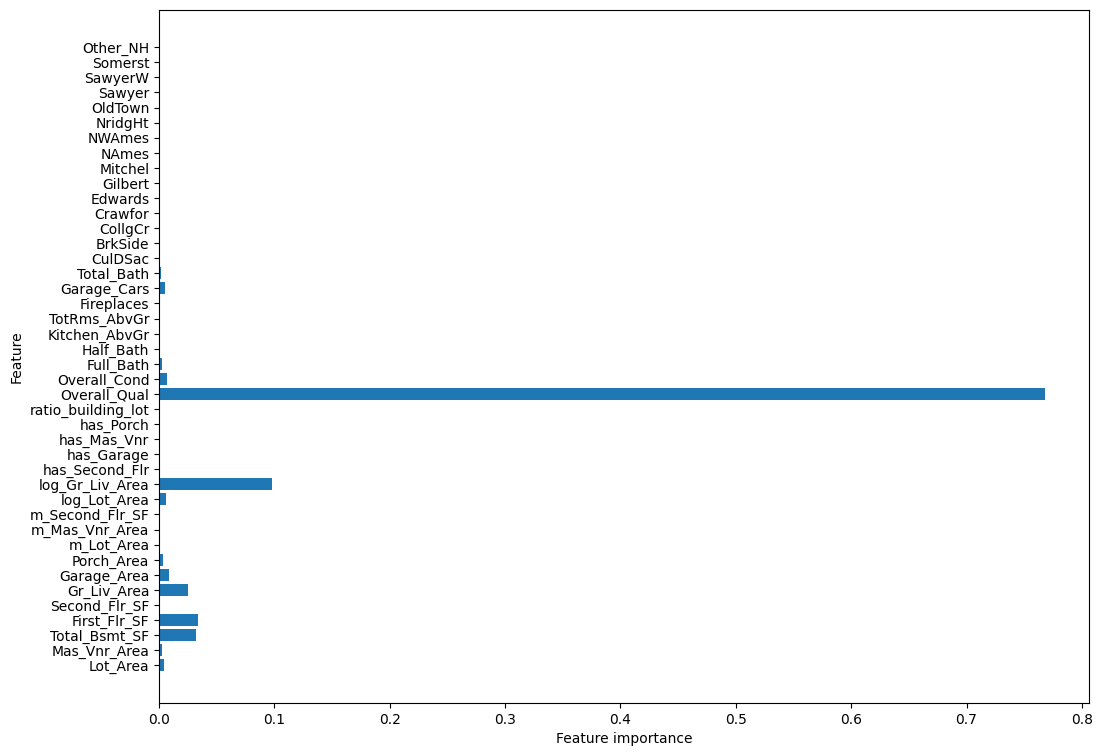

In [15]:
# checking feature importance
plot_feature_importances(model  = model,
                         x_data = x_data,
                         export = False)

<br>

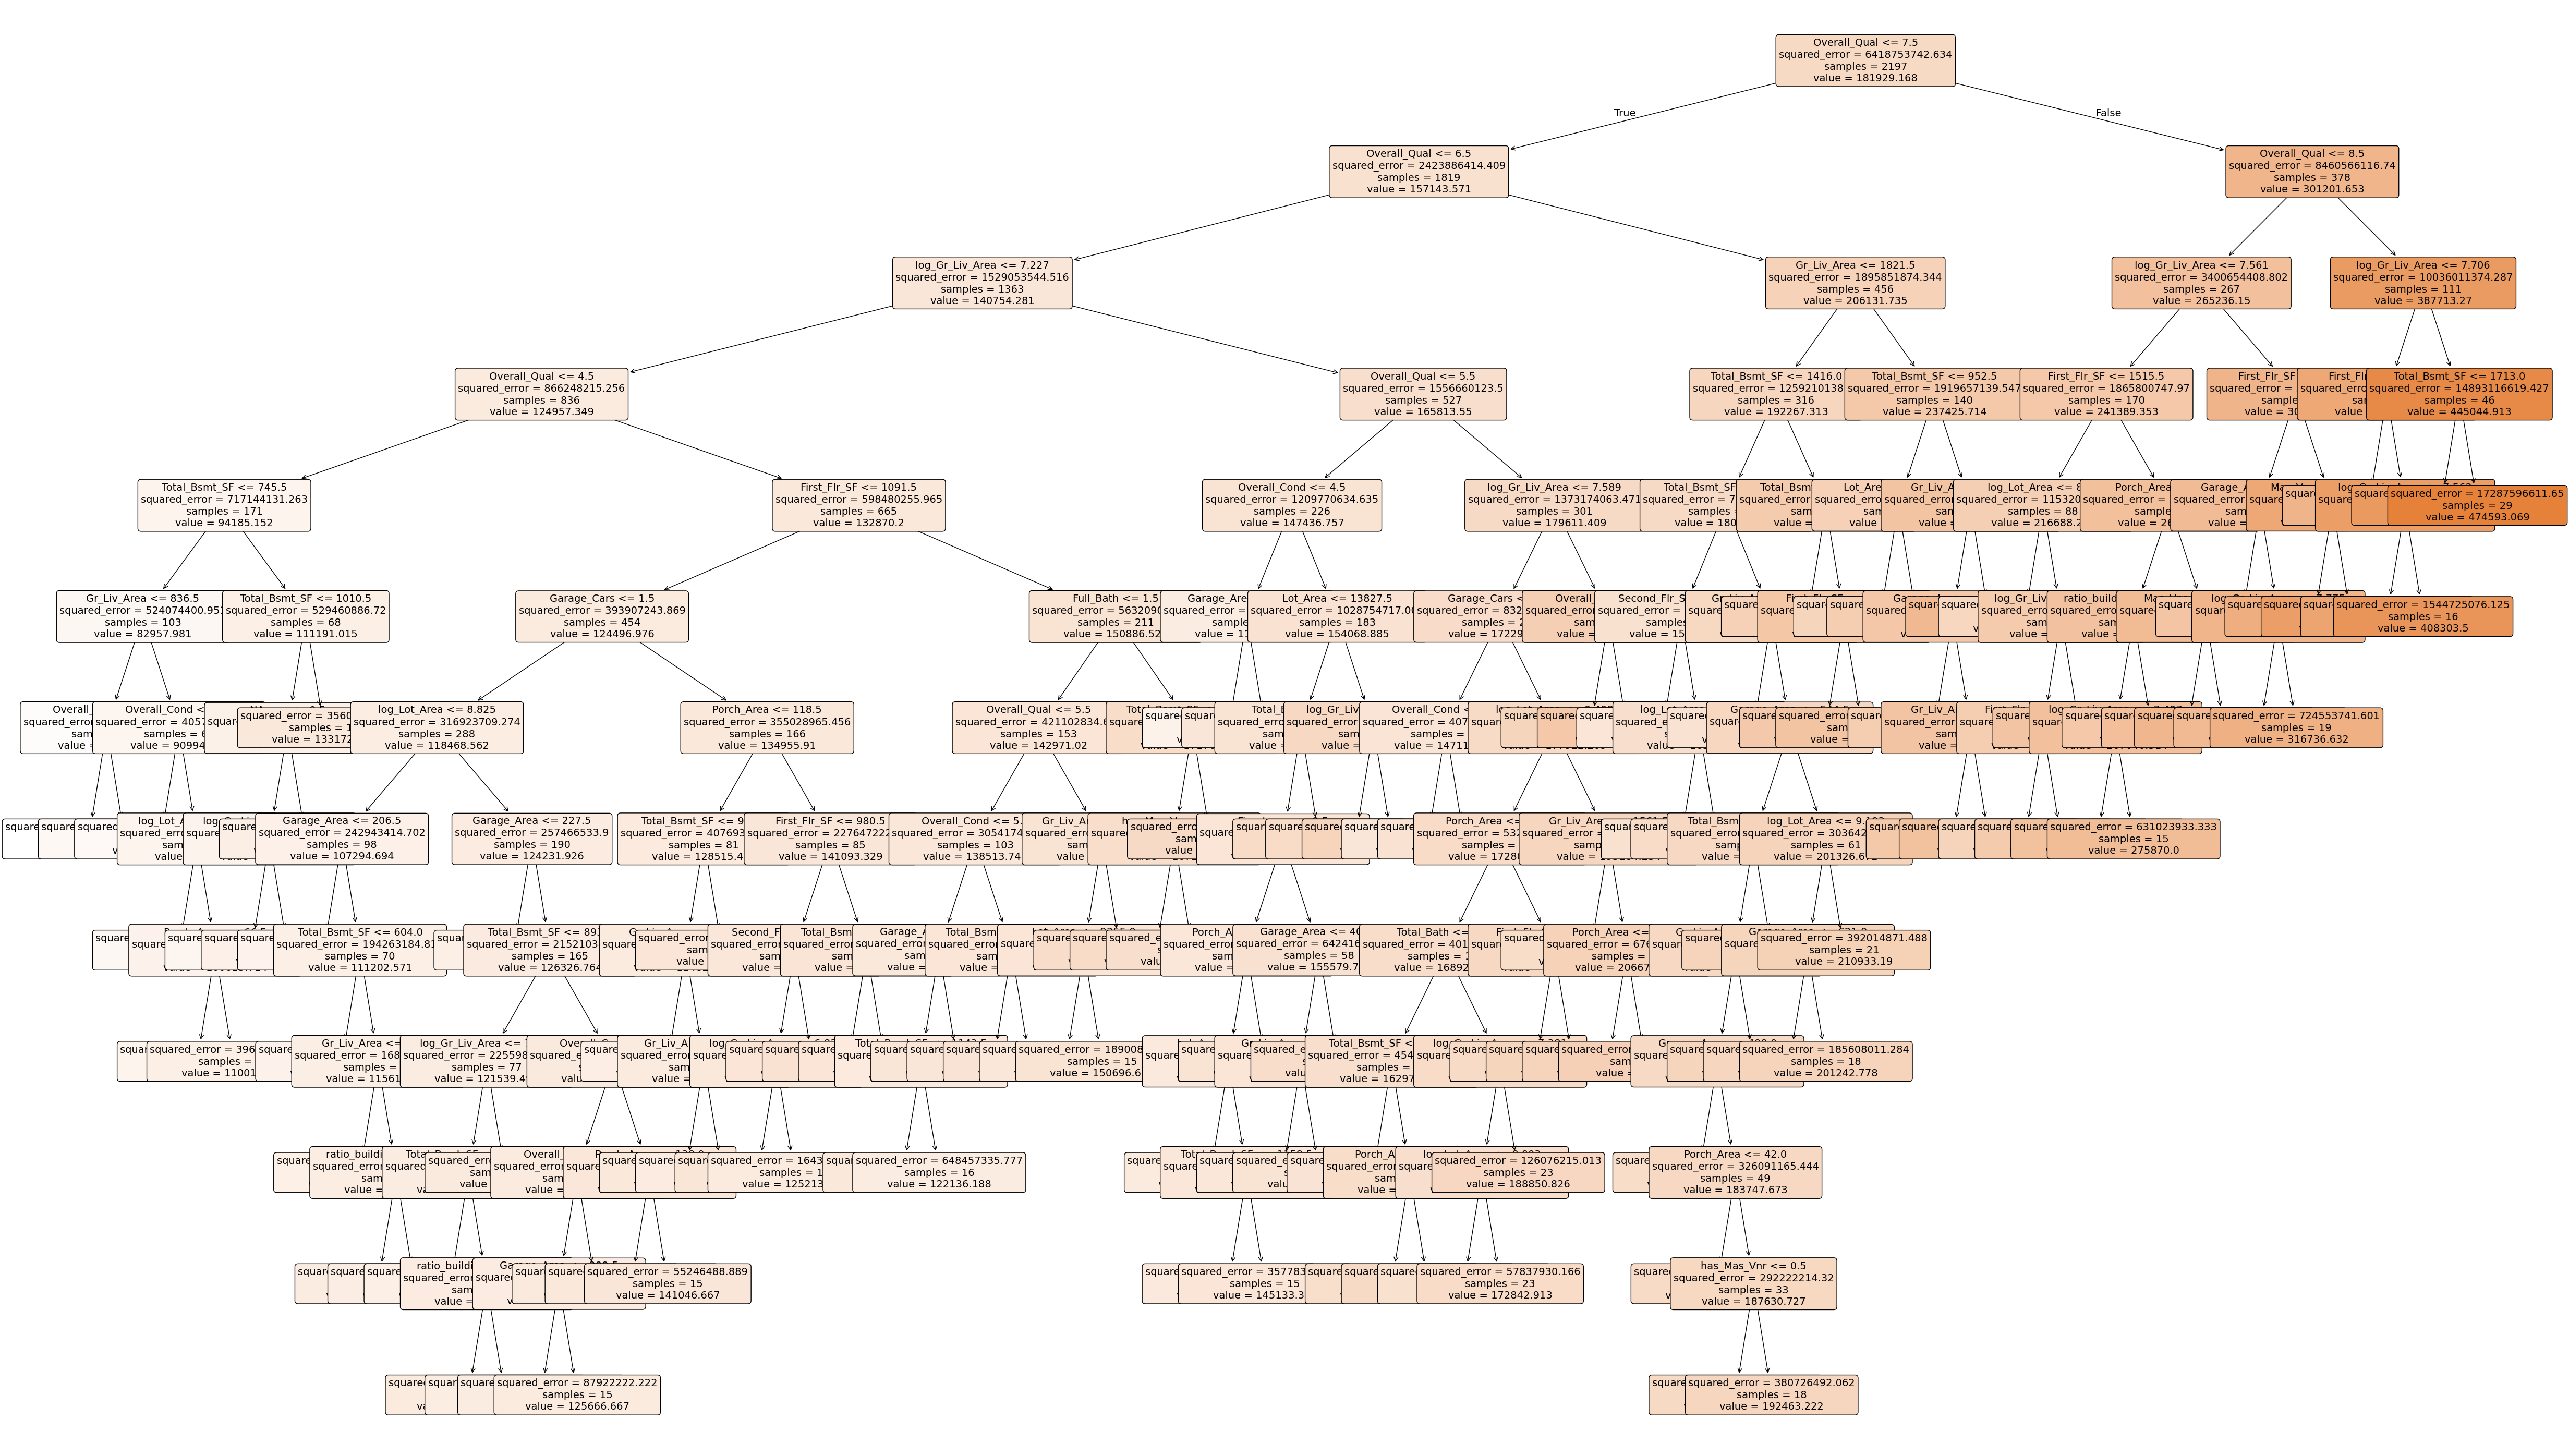

In [16]:
# setting figure size
plt.figure(figsize=(60, 36))


# developing a plotted tree
plot_tree(decision_tree = model, # changing to pruned_tree_fit
          feature_names = x_data.columns,
          filled        = True,
          rounded       = True,
          fontsize      = 14)


# rendering the tree
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Random Forest</h2><br>
A random forest can be thought of as a group of decision trees that are all slightly different from each other. This model type starts by randomly selecting a subset of explanatory variables and building a decision tree. Then, it takes another random subset of explanatory variables and builds another tree. After building several trees, each observation has several different results for its predicted value. This can be thought of as giving each tree a voice as to what the final prediction should be for each observation.

For example, one observation may have been voted positive 80% of the time (the event in question occurred), and voted negative 20% of the time (the event in question did not occur). After all votes have been cast, whichever class has the most votes wins, and prediction on the observation is complete.<br><br>
<h4>a) Build a random forest model.</h4>
Instantiate a random forest model using its default hyperparameters for the options . You know how to do this. Here is a help file to "help" you out. :)

In [17]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest regressor.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  regressors on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=Tru

<br>

In [18]:
# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 100,
                              criterion        = 'squared_error',
                              max_depth        = None,
                              min_samples_leaf = 2,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 702)

<br>

In [19]:
# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test , y_test) , ndigits = 4)
model_gap         = round(abs(model_train_score - model_test_score), ndigits = 4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.9721
Testing Score  : 0.8842
Train-Test Gap : 0.0879


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Tuned Random Forest</h3>
<br>
<strong>b) Build a stable random forest model.</strong><br>
Increase the values for <strong>max_depth</strong> and <strong>min_samples_leaf</strong>. Recall that a stable model will have a train-test gap of less than or equal to 0.05.

In [29]:
# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 100,
                              criterion        = 'squared_error',
                              max_features     = 10, #can set 'sqrt'
                              max_depth        = 12,
                              min_samples_leaf = 15,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test , y_test) , ndigits = 4)
model_gap         = round(abs(model_train_score - model_test_score), ndigits = 4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.8731
Testing Score  : 0.8541
Train-Test Gap : 0.019


<br>

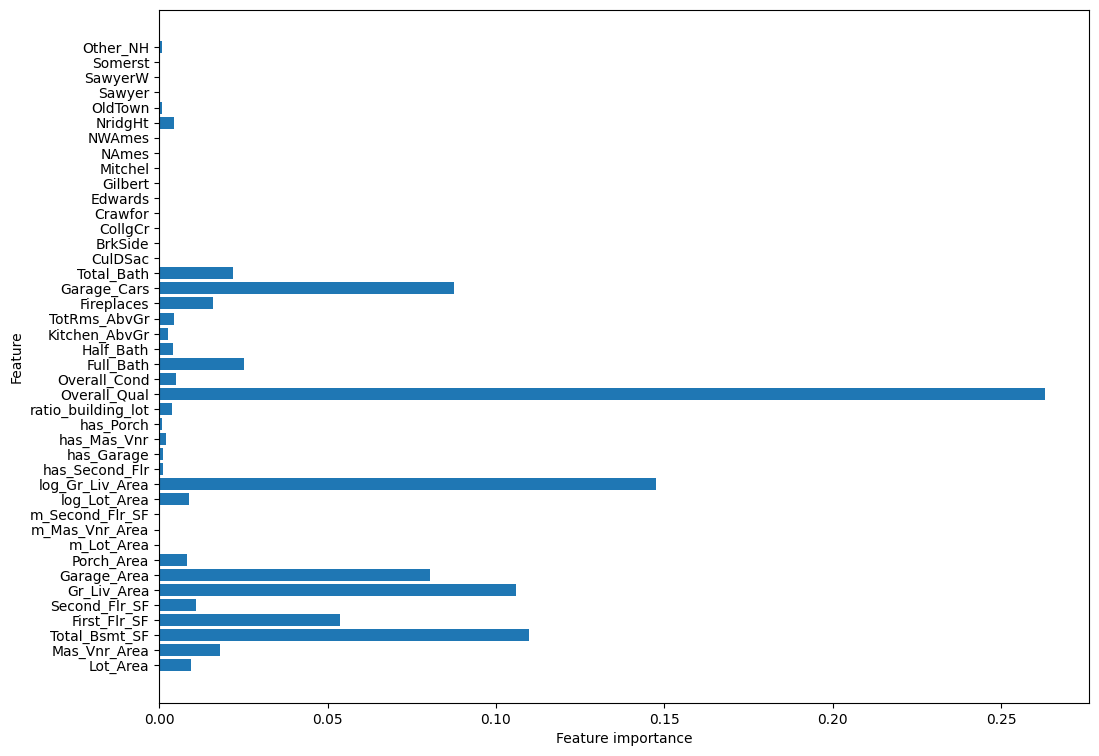

In [27]:
# plotting feature importance
plot_feature_importances(model,
                         x_data = x_data,
                         export = False )

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>c) Build a random forest model with all x-features except for Overall Quality.</strong><br>
Notice how Overall quality has taken over the model. Let's build a random forest model with all features except for this one.

In [33]:
# preparing x-features
x_data = housing[x_all].drop('Overall_Qual', axis=1)


# preparing y-feature
y_data = housing[ original_y ]


# train-test split
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 702)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>d) Complete the code below to optimize a regression tree based on the new x_data .

In [34]:
# building a stable tree model
quick_tree(x_data           = x_data,
           y_data           = y_data,
           model_type       = DecisionTreeRegressor,
           max_leaf_samples = 50,
           max_depth        = 20,
           cv_folds         = 3)

,depth,min_samples_leaf,folds,mean_RSS,mean_R2,RSS_range,R2_range
0,10,14,3,1444266133696.54,0.77,187168216847.19,0.03
1,11,14,3,1446800660604.38,0.77,193568222282.87,0.03
2,12,14,3,1447617463623.55,0.77,194243690135.81,0.03
3,12,21,3,1447941715127.65,0.77,143382851806.23,0.03
4,13,21,3,1447941715127.65,0.77,143382851806.23,0.03
5,13,14,3,1448433938275.72,0.77,195083773991.06,0.03
6,14,14,3,1448541856030.57,0.77,195083773991.06,0.03
7,9,6,3,1561441833390.92,0.75,188051443871.20,0.00
8,10,6,3,1563461539730.06,0.75,205487314213.55,0.00
9,11,6,3,1574646741123.74,0.75,227570842302.96,0.01


<br>

In [35]:
# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 100,
                              criterion        = 'squared_error',
                              max_depth        = 10,
                              min_samples_leaf = 14,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test , y_test) , ndigits = 4)
model_gap         = round(abs(model_train_score - model_test_score), ndigits = 4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.856
Testing Score  : 0.8259
Train-Test Gap : 0.0301


<br>

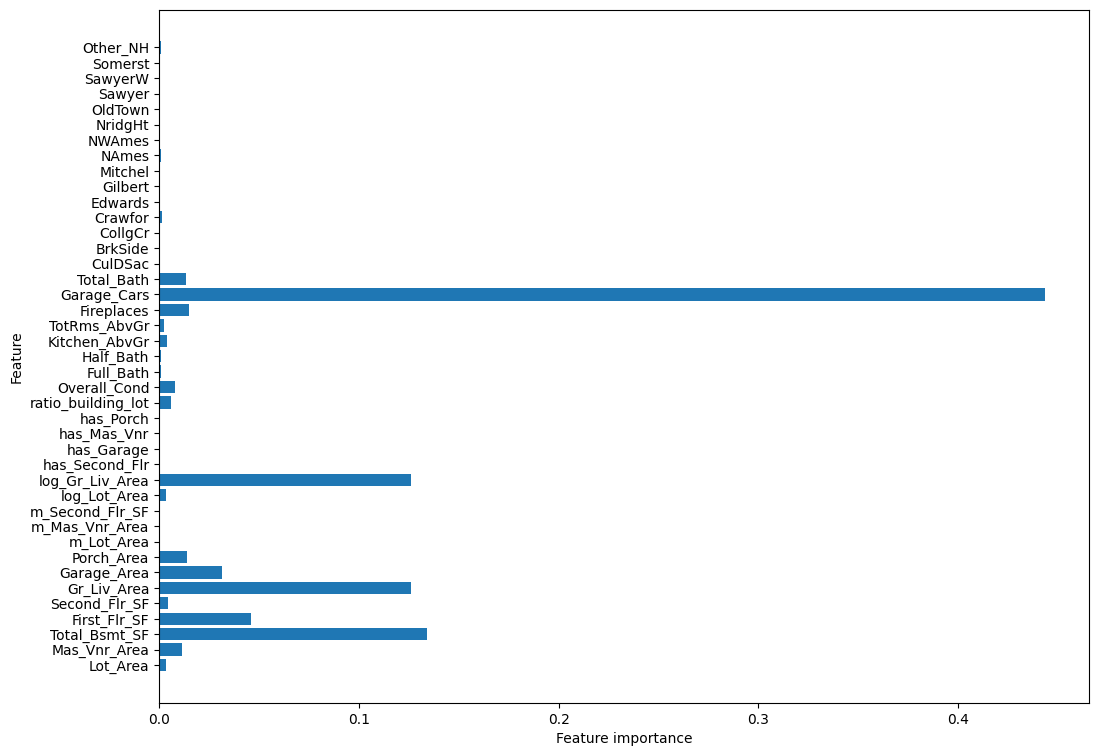

In [36]:
# plotting feature importance
plot_feature_importances(model,
                         x_data = x_data,
                         export = False )

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>e) Build a random forest model with all x-features except for Overall Quality and Garage Cars.</strong><br>
Now Garage Cars is taking over the model! Let's remove this feature as well and see what happens.

In [44]:
# preparing x-features
x_data = housing[x_all].drop(['Overall_Qual','Garage_Cars'], axis=1)


# preparing y-feature
y_data = housing[ original_y ]


# train-test split
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 702)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>f) Complete the code below to optimize a regression tree based on the new x_data.

In [45]:
# building a stable tree model
quick_tree(x_data           = x_data,
           y_data           = y_data,
           model_type       = DecisionTreeRegressor,
           max_leaf_samples = 50,
           max_depth        = 20,
           cv_folds         = 3)

,depth,min_samples_leaf,folds,mean_RSS,mean_R2,RSS_range,R2_range
0,15,17,3,1502454546288.01,0.76,208570212088.70,0.05
1,16,17,3,1502454546288.01,0.76,208570212088.70,0.05
2,17,17,3,1502454546288.01,0.76,208570212088.70,0.05
3,18,17,3,1502454546288.01,0.76,208570212088.70,0.05
4,19,17,3,1502454546288.01,0.76,208570212088.70,0.05
5,15,19,3,1502707071704.96,0.76,143370031040.57,0.04
6,16,19,3,1502707071704.96,0.76,143370031040.57,0.04
7,17,19,3,1502707071704.96,0.76,143370031040.57,0.04
8,18,19,3,1502707071704.96,0.76,143370031040.57,0.04
9,19,19,3,1502707071704.96,0.76,143370031040.57,0.04


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>g) Build a random forest model based on the results from the regression tree above.</strong>

In [51]:
# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 100,
                              criterion        = 'squared_error',
                              max_depth        = 10,
                              min_samples_leaf = 43,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test , y_test) , ndigits = 4)
model_gap         = round(abs(model_train_score - model_test_score), ndigits = 4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7894
Testing Score  : 0.7647
Train-Test Gap : 0.0247


<br>

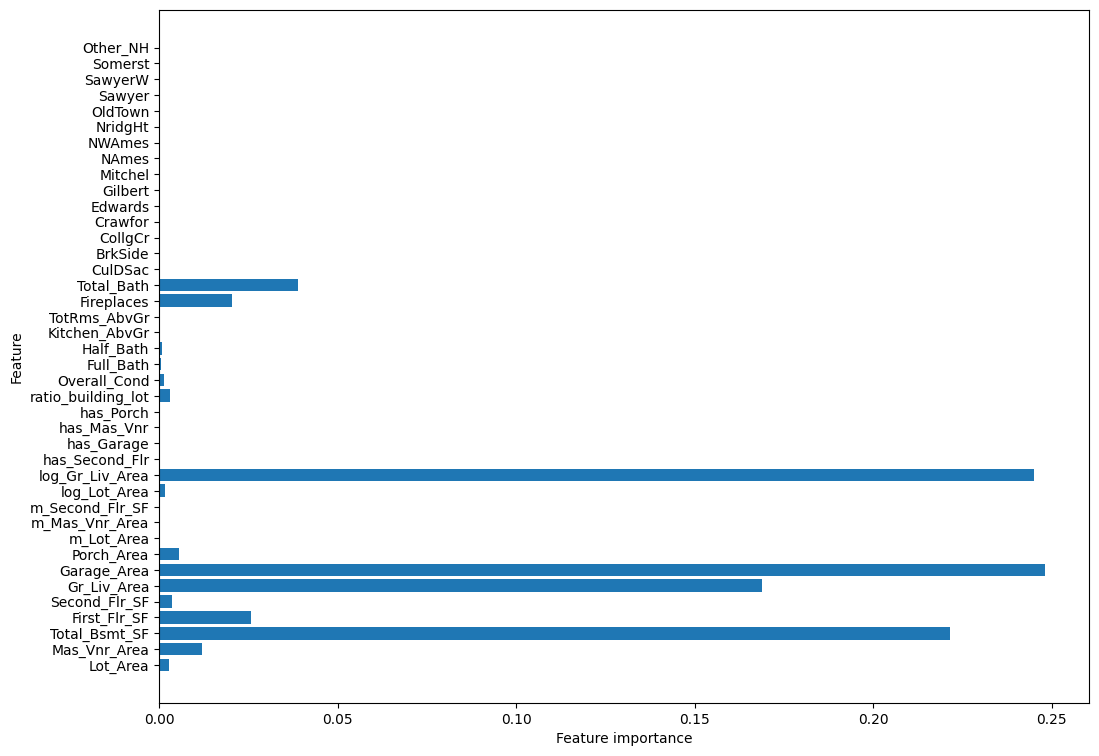

In [52]:
# plotting feature importance
plot_feature_importances(model,
                         x_data = x_data,
                         export = False )

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Gradient Boosting Machines</h2><br>
Gradient boosting machines (GBMs) are like decision trees, but instead of starting fresh with each iteration, they learn from the performance results of previous iterations. Unlike random forest, GBMs use a row-wise penalty instead of a column-wise penalty, reweighting each row instead of each column. Before getting started, we need to standardize the data due to the learning rate utilized in gradient boosting.<br><br>

In [53]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING and TRANSFORMING
x_scaled = scaler.fit_transform(housing[ x_all ])


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# labeling columns
x_scaled_df.columns = housing[ x_all ].columns


# checking the results
x_scaled_df.describe(include = 'number').round(decimals = 2)

,Lot_Area,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Garage_Area,Porch_Area,m_Lot_Area,m_Mas_Vnr_Area,m_Second_Flr_SF,log_Lot_Area,log_Gr_Liv_Area,has_Second_Flr,has_Garage,has_Mas_Vnr,has_Porch,ratio_building_lot,Overall_Qual,Overall_Cond,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Total_Bath,CulDSac,BrkSide,CollgCr,Crawfor,Edwards,Gilbert,Mitchel,NAmes,NWAmes,NridgHt,OldTown,Sawyer,SawyerW,Somerst,Other_NH
count,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00,2930.00
mean,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.12,-0.57,-2.38,-2.11,-0.78,-2.31,-2.20,-1.14,-0.18,-0.17,-0.28,-3.78,-4.46,-0.86,-4.19,-0.81,-2.25,-1.61,-3.61,-4.11,-2.83,-0.76,-4.88,-2.83,-0.93,-2.32,-2.73,-0.26,-0.20,-0.32,-0.19,-0.27,-0.24,-0.20,-0.42,-0.22,-0.25,-0.30,-0.23,-0.21,-0.26,-0.48
25%,-0.34,-0.57,-0.59,-0.72,-0.78,-0.74,-0.71,-0.84,-0.18,-0.17,-0.28,-0.35,-0.72,-0.86,0.24,-0.81,0.44,-0.55,-0.78,-0.51,-1.02,-0.76,-0.21,-0.92,-0.93,-1.01,-1.18,-0.26,-0.20,-0.32,-0.19,-0.27,-0.24,-0.20,-0.42,-0.22,-0.25,-0.30,-0.23,-0.21,-0.26,-0.48
50%,-0.09,-0.57,-0.14,-0.19,-0.78,-0.11,0.03,-0.11,-0.18,-0.17,-0.28,0.11,0.04,-0.86,0.24,-0.81,0.44,-0.22,-0.07,-0.51,0.78,-0.76,-0.21,-0.28,0.62,0.31,0.38,-0.26,-0.20,-0.32,-0.19,-0.27,-0.24,-0.20,-0.42,-0.22,-0.25,-0.30,-0.23,-0.21,-0.26,-0.48
75%,0.17,0.35,0.57,0.57,0.86,0.48,0.48,0.52,-0.18,-0.17,-0.28,0.51,0.63,1.16,0.24,1.24,0.44,0.14,0.64,0.39,0.78,1.23,-0.21,0.35,0.62,0.31,1.16,-0.26,-0.20,-0.32,-0.19,-0.27,-0.24,-0.20,-0.42,-0.22,-0.25,-0.30,-0.23,-0.21,-0.26,-0.48
max,26.07,8.39,11.47,10.04,4.04,8.19,4.72,7.77,5.62,5.79,3.54,6.28,4.24,1.16,0.24,1.24,0.44,8.12,2.77,3.09,4.40,3.22,9.14,5.44,5.25,4.25,5.05,3.91,5.11,3.16,5.24,3.76,4.09,4.97,2.37,4.62,4.08,3.36,4.29,4.74,3.89,2.10


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>a) Complete the code below to prepare the x- and y-data on the standardized version of the dataset.</strong>

In [127]:
# preparing x-features (standardized)
x_data = x_scaled_df[ x_all ].drop(['Overall_Qual','Garage_Cars'], axis=1)


# preparing y-feature
y_data = housing[ original_y ]


# train-test split
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 702)

<br>

In [55]:
help(GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble._gb:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |
 |  Gradient Boosting for regression.
 |
 |  This estimator builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage a regression tree is fit on the negative gradient of the given
 |  loss function.
 |
 |  :class:`~sklearn.ensemble.HistGradientBoostingRegressor` is a much faster variant
 |  of this algorithm for 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>b) Build a gradient boosting model based on the default hyperparameters from the documentation above.</strong>

In [128]:
# INSTANTIATING the model object
model = GradientBoostingRegressor(loss             = 'squared_error',
                                  learning_rate    = 0.001,
                                  n_estimators     = 15000,
                                  criterion        = 'friedman_mse',
                                  min_samples_leaf = 3,
                                  max_depth        = 2,
                                  max_features     = 10,
                                  warm_start       = False,
                                  random_state     = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test , y_test) , ndigits = 4)
model_gap         = round(abs(model_train_score - model_test_score), ndigits = 4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.8997
Testing Score  : 0.8622
Train-Test Gap : 0.0375


<br>

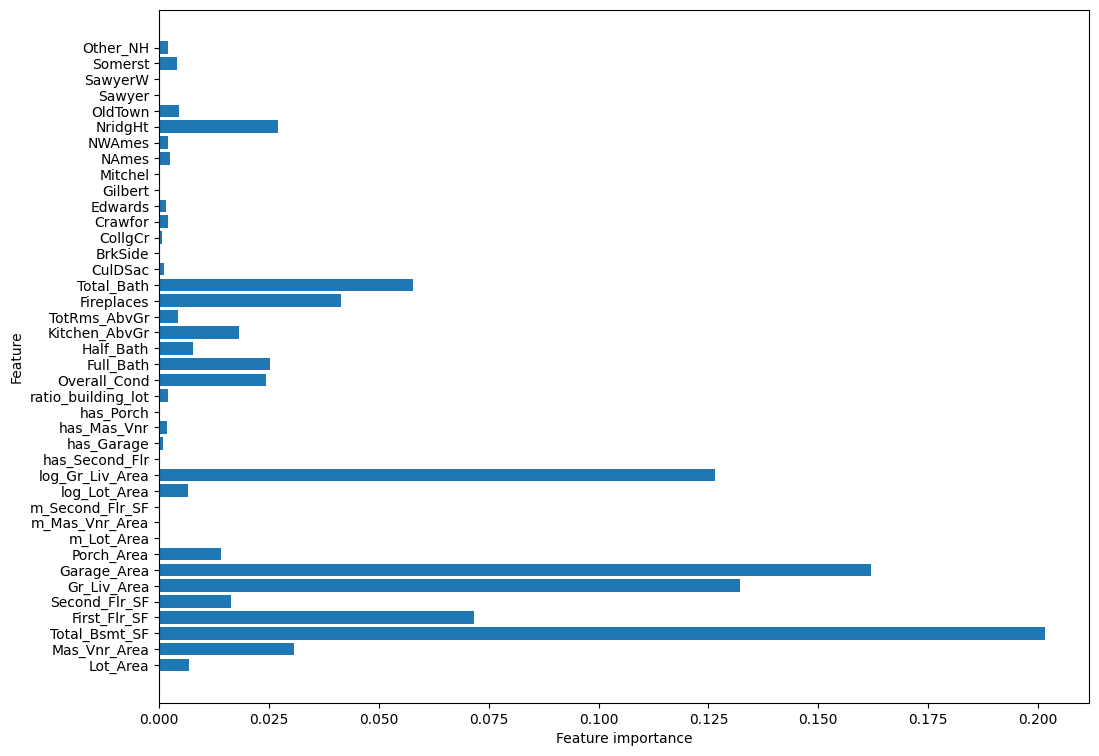

In [129]:
# plotting feature importance
plot_feature_importances(model,
                         x_data = x_data,
                         export = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>c) Complete the code below to optimize a regression tree based on the new x_data.</strong>

In [65]:
# building a stable tree model
quick_tree(x_data           = x_data,
           y_data           = y_data,
           model_type       = DecisionTreeRegressor,
           max_leaf_samples = 50,
           max_depth        = 20,
           cv_folds         = 3)

,depth,min_samples_leaf,folds,mean_RSS,mean_R2,RSS_range,R2_range
0,10,14,3,1444266133696.54,0.77,187168216847.19,0.03
1,11,14,3,1446800660604.38,0.77,193568222282.87,0.03
2,12,14,3,1447617463623.55,0.77,194243690135.81,0.03
3,13,14,3,1448433938275.72,0.77,195083773991.06,0.03
4,14,14,3,1448541856030.57,0.77,195083773991.06,0.03
5,9,6,3,1561441833390.92,0.75,188051443871.20,0.00
6,10,6,3,1563461539730.06,0.75,205487314213.55,0.00
7,14,6,3,1583854553642.11,0.75,227287596184.36,0.01
8,6,5,3,1665638220179.76,0.73,38828010562.44,0.04
9,5,6,3,1750153659531.65,0.72,37559606646.57,0.04


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>d) Build a gradient boosting regressor model based on the results from the regression tree above.</strong>

In [81]:
# INSTANTIATING the model object without hyperparameters
model = GradientBoostingRegressor(loss             = 'squared_error',
                                  learning_rate    = 0.0125,
                                  n_estimators     = 1000,
                                  criterion        = 'friedman_mse',
                                  min_samples_leaf = 3,
                                  max_depth        = 3,
                                  max_features     = 2,
                                  warm_start       = False,
                                  random_state     = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test , y_test) , ndigits = 4)
model_gap         = round(abs(model_train_score - model_test_score), ndigits = 4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.9069
Testing Score  : 0.8589
Train-Test Gap : 0.048


With car:
Training Score : 0.9065
Testing Score  : 0.8611
Train-Test Gap : 0.0454

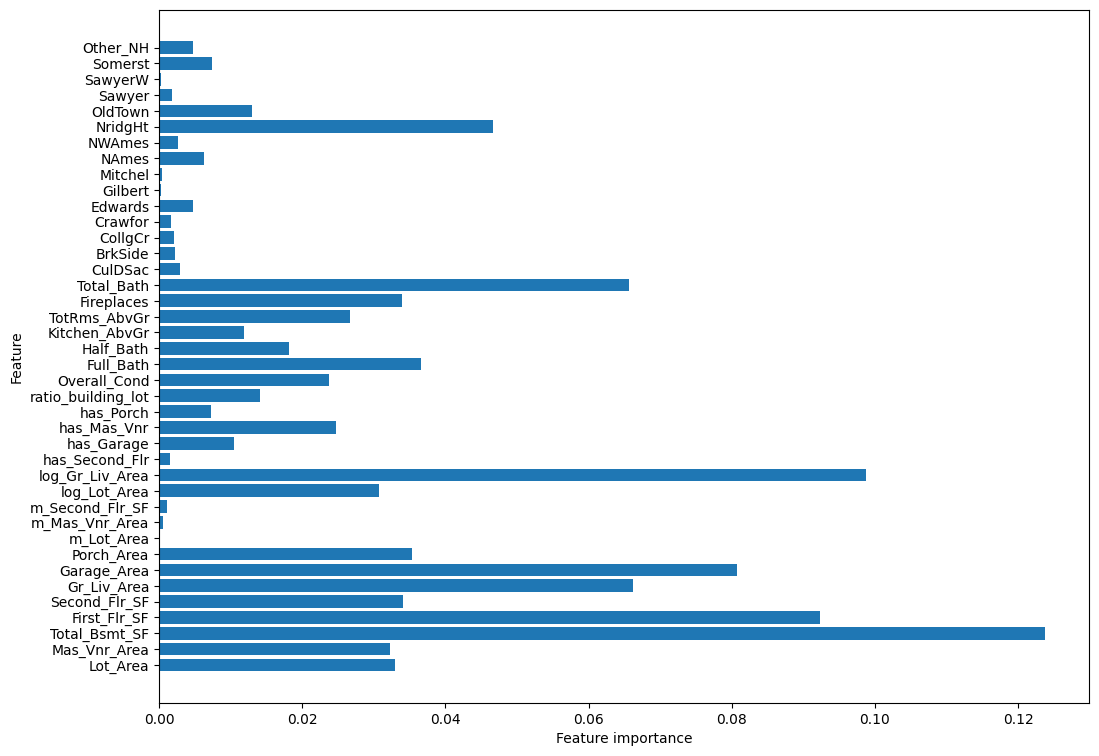

In [82]:
plot_feature_importances(model,
                         x_data = x_data,
                         export = False )

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>e) Test out different hyperparameters for the gradient boosting model.</strong><br>
GBMs operate differently than regression trees and random forest. One of the best ways to get to know this model type better is to tinker with it and analyze the results. Try changing your x- and y-data as well.

In [ ]:
# INSTANTIATING the model object without hyperparameters
model = GradientBoostingRegressor(loss             = _____,
                                  learning_rate    = _____,
                                  n_estimators     = _____,
                                  criterion        = _____,
                                  min_samples_leaf = _____,
                                  max_depth        = _____,
                                  warm_start       = _____,
                                  random_state     = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test , y_test) , ndigits = 4)
model_gap         = round(abs(model_train_score - model_test_score), ndigits = 4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

<br>

In [ ]:
# plotting feature importance
plot_feature_importances(model,
                         x_data = x_data,
                         export = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~
      ___  ___  __                 
|__/ |__  |__  |__)                
|  \ |___ |___ |                   
                                   
 __   __   __               __    /
/ _` |__) /  \ |  | | |\ | / _`  /
\__> |  \ \__/ |/\| | | \| \__> .  



~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>